# REFERENCES:
    https://towardsdatascience.com/youtube-views-predictor-9ec573090acb
    https://github.com/allenwang28/YouTube-Virality-Predictor/blob/master/notebooks/Data%20Exploration%20-%20Time%20Based.ipynb:     cells 30,34,35,36,37,40,41,42,43,154,155,156,161,162,163,164

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
#Read excel
df = pd.read_excel('FilteredVideoDetails.xlsx')

In [3]:
df.describe()

,CategoryID,CHViewCount,CHSubscriberCount,CHAge,CHVideoCount,Duration,ViewCount,LikeCount,DislikeCount,FavouriteCount,...,PComments,PDislike,PFavorite,PLikePerView,AgeVideo,LogLikePerView,ViewDiff,ViewsPercentChange,TimeDiff,Daysdiff
count,1410.000000,1.410000e+03,1.410000e+03,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.0,...,1410.000000,1410.000000,1410.0,1410.000000,1410.000000,1410.000000,1.410000e+03,1410.000000,1410.000000,1410.000000
mean,22.226241,9.248270e+07,5.938399e+05,478.848936,252.937589,432.037589,45032.668085,1240.529787,42.590780,0.0,...,199.550355,89.082270,0.0,3.441052,147.493617,0.899074,-4.438520e+04,1.263867,8.554610,8.541844
std,4.852752,1.818622e+08,1.240150e+06,654.717114,176.788536,239.071769,65782.677637,2178.539286,85.901436,0.0,...,637.198548,417.020719,0.0,3.381827,120.034962,0.909349,2.146491e+05,9.825618,37.636492,37.558717
min,1.000000,3.386900e+04,0.000000e+00,16.000000,16.000000,15.000000,36.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,31.000000,-3.278002,-2.404876e+06,-0.997199,1.000000,1.000000
25%,22.000000,2.565808e+06,2.013800e+04,161.000000,88.000000,249.000000,2134.250000,46.000000,2.000000,0.0,...,11.000000,2.000000,0.0,1.343487,62.000000,0.355902,-1.439675e+04,-0.523526,2.000000,2.000000
50%,22.000000,1.487783e+07,6.880800e+04,276.000000,212.000000,393.000000,13776.500000,239.000000,13.000000,0.0,...,48.000000,13.000000,0.0,2.715267,108.500000,1.049323,-1.475000e+02,-0.086935,3.000000,3.000000
75%,26.000000,1.229979e+08,5.591230e+05,461.000000,395.000000,603.000000,58568.000000,1351.250000,48.000000,0.0,...,159.000000,55.250000,0.0,4.405900,184.000000,1.504796,3.708750e+03,0.690442,7.000000,7.000000
max,29.000000,9.856295e+08,7.004005e+06,5101.000000,629.000000,1202.000000,274262.000000,15752.000000,1090.000000,0.0,...,14535.000000,11411.000000,0.0,37.209302,604.000000,3.616559,2.563840e+05,288.760317,929.000000,928.000000


In [4]:
df.shape

(1410, 43)

# Models

# 1. Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
gbrcolumns = ['CHSubscriberCount','CHAge','PComments','PLikePerView','Duration','Comm_count_p2','AgeVideo']
X_dfgrb = df[gbrcolumns]
y_dfgrb = df['LikePerView']
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb, y_dfgrb, test_size=0.2,random_state=42)

In [149]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.45542761006708887

Linear regression provides poor accuracy hence moving to ensemble models like GradientBoostingRegressor and RandomForestRegressor

# 2. GradientBoostingRegressor

Features include count of sentiment after 2 days of video being published

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [150]:
#, 'CHVideoCount', 'CHViewCount'
gbrcolumns = ['CHSubscriberCount','CHAge','PComments','PLikePerView','Duration','Comm_count_p2','AgeVideo']
X_dfgrb = df[gbrcolumns]
y_dfgrb = df['LikePerView']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb, y_dfgrb, test_size=0.2,random_state=42)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }
grbreg = GradientBoostingRegressor(**params)
grbreg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [152]:
grbreg.score(X_test, y_test)

0.58138903698098598

In [153]:
mse = mean_squared_error(y_test, grbreg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 4.3987


Models gives an R^2 of 0.58 when it tries to predict LikePerView, this could be because LikePerView is not normally distributed.

Hence using LogLikePerView as target variable

In [154]:
y_dfgrb = df['LogLikePerView']
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb, y_dfgrb, test_size=0.2,random_state=42)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }
grbreg = GradientBoostingRegressor(**params)
grbreg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [155]:
grbreg.score(X_test, y_test)

0.74882411399563831

In [156]:
mse = mean_squared_error(y_test, grbreg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1963


As it can be seen that by using LogLikePerView as target variable(normally distributed), the model performs much better

Features include count of sentiment after 7 days of video being published

In [157]:
gbrcolumns7 = ['CHSubscriberCount','CHAge','PComments','PLikePerView','Duration','Comm_count_p7','AgeVideo']
X_dfgrb7 = df[gbrcolumns7]
y_dfgrb7 = df['LogLikePerView']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb7, y_dfgrb7, test_size=0.2,random_state=42)
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }    
grb7reg = GradientBoostingRegressor(**params)
grb7reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [159]:
grb7reg.score(X_test, y_test)

0.77198822520475685

In [160]:
mse = mean_squared_error(y_test, grb7reg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1782


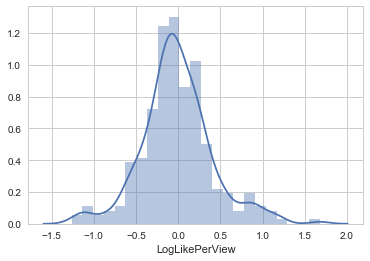

In [161]:
y_predgrb = grb7reg.predict(X_test)
residuals = y_predgrb - y_test

sns.distplot(residuals)

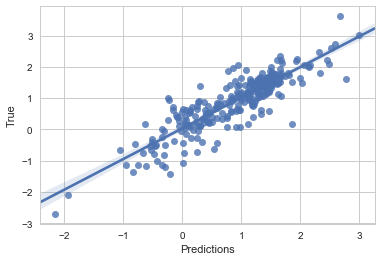

In [162]:
plot_df = pd.DataFrame(y_predgrb, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

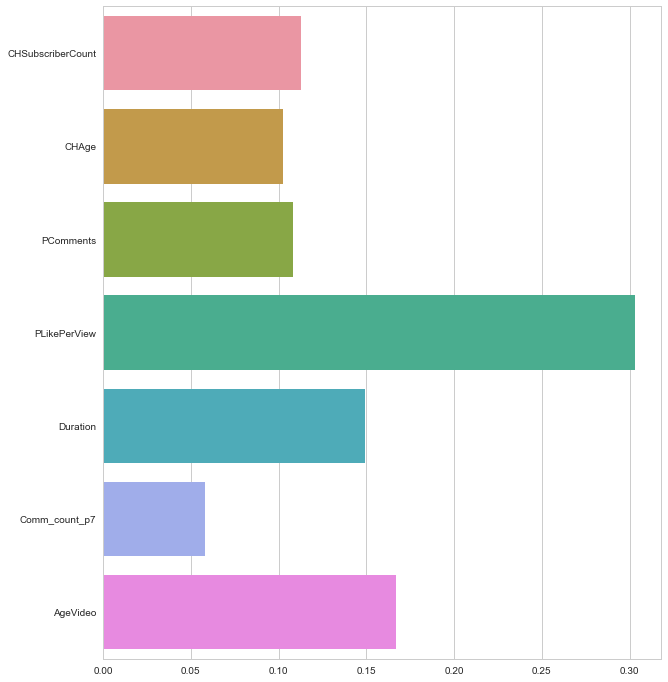

In [163]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=grb7reg.feature_importances_, y=gbrcolumns7)

In [164]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(grb7reg, X_dfgrb7, y_dfgrb7, scoring='neg_mean_squared_error',cv=5)
cv1 = np.sqrt(-cv1)
print("{0} +- {1}".format(cv1.mean(), cv1.var()))

0.615972077127708 +- 0.004716243332288276


# 3. XGBRegressor Model
Considering comment count in 7 day

In [ ]:
from xgboost import XGBRegressor

In [129]:
params = {'n_estimators': 1000, 'max_depth': 4,'learning_rate': 0.01}
xgb = XGBRegressor(**params)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.76686854702261253

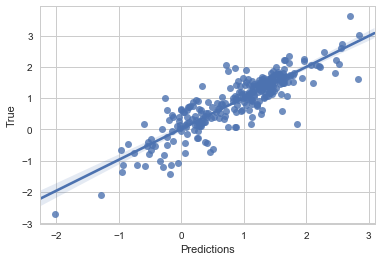

In [130]:
y_pred = xgb.predict(X_test)
plot_df = pd.DataFrame(y_pred, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

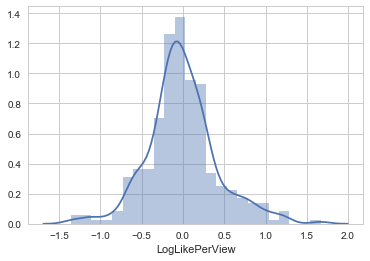

In [131]:
residuals = y_pred - y_test
sns.distplot(residuals)

In [132]:
mse = mean_squared_error(y_test, xgb.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1822


In [133]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(xgb,X_dfgrb7, y_dfgrb7, scoring='neg_mean_squared_error',cv=5)
cv1 = np.sqrt(-cv1)
print("{0} +- {1}".format(cv1.mean(), cv1.var()))

0.6089669132473265 +- 0.004205611040925812


# 4. Random Forest regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rm = RandomForestRegressor(n_estimators=500,random_state=42)
rm.fit(X_train, y_train)
rm.score(X_test, y_test)

0.78728254422146304

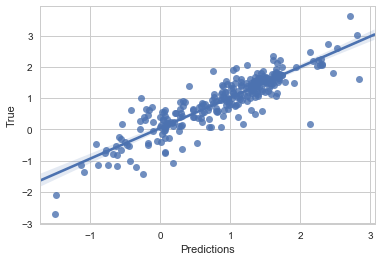

In [124]:
y_pred = rm.predict(X_test)
plot_df = pd.DataFrame(y_pred, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

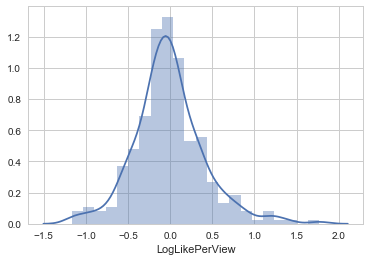

In [118]:
residuals = y_pred - y_test

sns.distplot(residuals)

In [119]:
mse = mean_squared_error(y_test, xgb.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2067


In [144]:
evaluate(rm,X_test, y_test)

Model Performance
Average Error: 0.2937 degrees.
Accuracy = 62.93%.


62.93165319536295

# HYPER-PARAMETER TUNING - RandomForest
Entire code below referenced from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [135]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [136]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_dfgrb7, y_dfgrb7)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [138]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [141]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.2256 degrees.
Accuracy = 84.35%.


After using RandomizedSearchCV RandomForest gives an accuracy of 84.35% as compared to base RandomForest model with 63% accuracy
this is because we have tuned the parameters and RandomizedSearchCV picks up parameters which would give best accuracy

# Recommendation
As seens from XGBoost the features which affect LikePerView includes Duration of the video. This is an obvious recommendation that if the video is of short duration and conveys more information, it will be liked by many people.

Another one will be, to upload video from a famous Channel, that affects the likeability of the video.